In [1]:
from scipy.integrate import trapz
from tqdm import tqdm
from astropy.time import Time

from astropy.coordinates import solar_system_ephemeris
from astropy.coordinates import get_icrs_coordinates, AltAz, EarthLocation, get_body

from astropy.visualization import astropy_mpl_style, quantity_support
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support, time_support
plt.style.use(astropy_mpl_style)
%matplotlib inline

In [2]:
t0 = Time('2020-11-25 00:00')
delta_days = np.linspace(0, 365, num=365) * u.d
delta_hours = np.linspace(0, 24, num=400) * u.hr
times = t0 + delta_hours
loc = EarthLocation.of_address('Pordenone, Italy')


In [3]:
def solar_flux(midnight, loc):
    delta_hours = np.linspace(0, 24, num=400) * u.hr
    times = midnight + delta_hours
    with solar_system_ephemeris.set('builtin'):
        sun = get_body('sun',times)
        ear = get_body('earth',times)

    altaz = AltAz(location=loc, obstime=times)
    aa_sun = sun.transform_to(altaz)

    flux_multiplier = np.maximum(np.sin(aa_sun.alt), 0)
    dist = sun.separation_3d(ear)
    power_1 = u.L_sun / (4 * np.pi * dist**2) 
    power = (flux_multiplier * power_1).to(u.W / u.m**2)

    energy_1 = trapz(power.value, delta_hours.value)
    energy = energy_1 * delta_hours.unit * power.unit

    return(delta_hours, power, energy)

3151.1330280037982 h W / m2


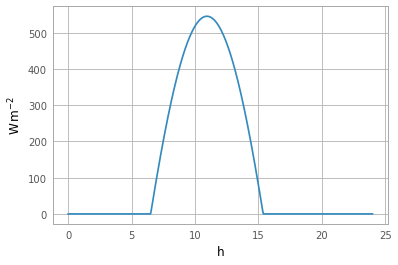

In [4]:
t0 = Time('2020-11-25 00:00')
loc = EarthLocation.of_address('Pordenone, Italy')

dt, power, energy = solar_flux(Time('2020-11-26 00:00'), EarthLocation.of_address('Pordenone, Italy'))
print(energy)
with quantity_support():
    plt.plot(dt, power)


In [48]:
start = Time('2020-12-25 00:00')
loc = EarthLocation.of_address('Pordenone, Italy')
length = 200
times = start + np.arange(length) * u.d
energies = np.zeros(length) * u.h * u.kW / u.m**2
for i, day in enumerate(tqdm(times)):
    dt, power, energy = solar_flux(day, loc)
    energies[i] = energy


100%|██████████| 200/200 [01:12<00:00,  2.75it/s]


In [49]:
with quantity_support(), time_support():
    plt.plot(times, energies)

ValueError: month must be in 1..12

In [51]:
set(x.month for x in times.datetime)

{1, 2, 3, 4, 5, 6, 7, 12}